# Basic Operations in TensorFlow

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Basic constant operations


In [7]:
a = tf.constant(3)
b = tf.constant(4)

### Launch the default graph

In [8]:
with tf.Session() as sess:
    print "Addition", sess.run(a+b)
    print "Multiplication", sess.run(a*b)

Addition 7
Multiplication 12


### Basic Operations with variable as graph input

In [9]:
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

In [10]:
a

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=int16>

### Define some operations

In [11]:
add = tf.add(a, b)
mul = tf.mul(a, b)

In [12]:
mul

<tf.Tensor 'Mul:0' shape=<unknown> dtype=int16>

### Launch the default graph

In [13]:
with tf.Session() as sess:
    print "Addition with variables: {}".format(sess.run(add, feed_dict={a:3, b:4}))
    print "Multiplication with variables: {}".format(sess.run(mul, feed_dict={a:3, b:4}))

Addition with variables: 7
Multiplication with variables: 12


### Matrix Multiplication

In [14]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.], [2.]])

In [15]:
product = tf.matmul(matrix1, matrix2)

In [16]:
with tf.Session() as sess:
    print "Matrix multiplication: {}".format(sess.run(product))

Matrix multiplication: [[ 12.]]


In [17]:
n_values = 32
x = tf.linspace(-3.0, 3.0, n_values)

In [18]:
# %% Construct a tf.Session to execute the graph.
sess = tf.Session()
result = sess.run(x)

In [19]:
result

array([-3.        , -2.80645156, -2.61290312, -2.41935492, -2.22580647,
       -2.03225803, -1.83870971, -1.64516139, -1.45161295, -1.25806451,
       -1.06451619, -0.87096786, -0.67741942, -0.48387098, -0.29032278,
       -0.09677434,  0.0967741 ,  0.29032254,  0.48387098,  0.67741919,
        0.87096763,  1.06451607,  1.25806427,  1.45161295,  1.64516115,
        1.83870935,  2.03225803,  2.22580624,  2.41935444,  2.61290312,
        2.80645132,  3.        ], dtype=float32)

In [20]:
sess.close()
sess = tf.InteractiveSession()

In [21]:
# %% Now a tf.Operation
# We'll use our values from [-3, 3] to create a Gaussian Distribution
sigma = 1.0
mean = 0.0
z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

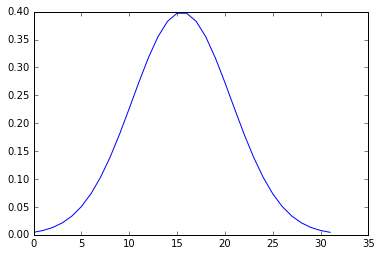

In [22]:
plt.plot(z.eval())
plt.show()

In [23]:
# %% We can find out the shape of a tensor like so:
print(z.get_shape())

(32,)


In [24]:
# %% Or in a more friendly format
print(z.get_shape().as_list())

[32]


In [25]:
print(tf.shape(z).eval())

[32]


In [26]:
# %% We can combine tensors like so:
print(tf.pack([tf.shape(z), tf.shape(z), [3], [4]]).eval())

[[32]
 [32]
 [ 3]
 [ 4]]


In [27]:
# %% Let's multiply the two to get a 2d gaussian
z_2d = tf.matmul(tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))

In [28]:
tf.shape(z_2d).eval()

array([32, 32], dtype=int32)

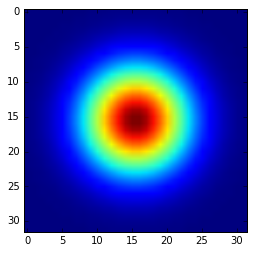

In [29]:
# %% Execute the graph and store the value that `out` represents in `result`.
plt.imshow(z_2d.eval())

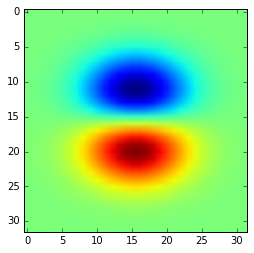

In [30]:
# %% For fun let's create a gabor patch:
x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
y = tf.reshape(tf.ones_like(x), [1, n_values])
z = tf.mul(tf.matmul(x, y), z_2d)
plt.imshow(z.eval())

In [31]:
# %% We can also list all the operations of a graph:
ops = tf.get_default_graph().get_operations()
print([op.name for op in ops])

[u'Const', u'Const_1', u'add', u'mul', u'Placeholder', u'Placeholder_1', u'Add', u'Mul', u'Const_2', u'Const_3', u'MatMul', u'LinSpace/start', u'LinSpace/stop', u'LinSpace/num', u'LinSpace', u'sub/y', u'sub', u'Pow/y', u'Pow', u'Pow_1/x', u'Pow_1/y', u'Pow_1', u'mul_1/x', u'mul_1', u'div', u'Neg', u'Exp', u'Sqrt/x', u'Sqrt', u'mul_2/x', u'mul_2', u'div_1/x', u'div_1', u'mul_3', u'Shape', u'Shape_1', u'Shape_2', u'pack/values_2', u'pack/values_3', u'pack', u'Reshape/shape', u'Reshape', u'Reshape_1/shape', u'Reshape_1', u'MatMul_1', u'Shape_3', u'LinSpace_1/start', u'LinSpace_1/stop', u'LinSpace_1/num', u'LinSpace_1', u'Sin', u'Reshape_2/shape', u'Reshape_2', u'ones_like/Shape', u'ones_like/Const', u'ones_like', u'Reshape_3/shape', u'Reshape_3', u'MatMul_2', u'Mul_1']


In [32]:
# %% Lets try creating a generic function for computing the same thing:
def gabor(n_values=32, sigma=1.0, mean=0.0):
    x = tf.linspace(-3.0, 3.0, n_values)
    z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) /
                       (2.0 * tf.pow(sigma, 2.0)))) *
         (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
    gauss_kernel = tf.matmul(
        tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))
    x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
    y = tf.reshape(tf.ones_like(x), [1, n_values])
    gabor_kernel = tf.mul(tf.matmul(x, y), gauss_kernel)
    return gabor_kernel

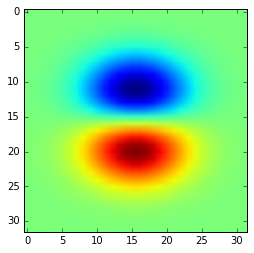

In [33]:
# %% Confirm this does something:
plt.imshow(gabor().eval())

In [57]:
# %% And another function which can convolve
def convolve(img, W):
    # The W matrix is only 2D
    # But conv2d will need a tensor which is 4d:
    # height x width x n_input x n_output
    if len(W.get_shape()) == 2:
        dims = W.get_shape().as_list() + [1, 1]
        W = tf.reshape(W, dims)

    if len(img.get_shape()) == 2:
        # num x height x width x channels
        dims = [1] + img.get_shape().as_list() + [1]
        img = tf.reshape(img, dims)
    elif len(img.get_shape()) == 3:
        dims = [1] + img.get_shape().as_list()
        img = tf.reshape(img, dims)
        # if the image is 3 channels, then our convolution
        # kernel needs to be repeated for each input channel
        W = tf.concat(2, [W, W, W])

    # Stride is how many values to skip for the dimensions of
    # num, height, width, channels
    convolved = tf.nn.conv2d(img, W,
                             strides=[1, 1, 1, 1], padding='SAME')
    return convolved

In [62]:
sess.close()
sess = tf.InteractiveSession()

(512, 512, 3)


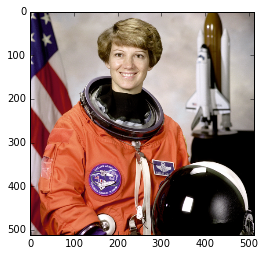

In [63]:
# %% Load up an image:
from skimage import data
#img = data.rocket()
img = data.astronaut()
#img = data.coffee()
plt.imshow(img)
print(img.shape)

In [64]:
# %% Now create a placeholder for our graph which can store any input:
x = tf.placeholder(tf.float32, shape=img.shape)

In [121]:
# %% And a graph which can convolve our image with a gabor
out = convolve(x, gabor(n_values=5, sigma=1.0, mean=1.0))

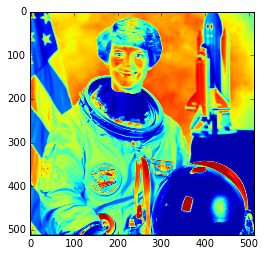

In [122]:
# %% Now send the image into the graph and compute the result
result = tf.squeeze(out).eval(feed_dict={x: img})
plt.imshow(result)

In [49]:
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

add = tf.add(a,b)
mul = tf.mul(a,b)

with tf.Session() as sess:
    print(sess.run(add, feed_dict = {a:4, b:7}))
    print(sess.run(mul, feed_dict = {a:4, b:7}))

11
28


Exception AssertionError: AssertionError() in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x10fbf4910>> ignored


In [4]:
matrix = np.array([[1,2],[3,4]])
M = tf.placeholder(tf.int16, shape = matrix.shape)
b = tf.placeholder(tf.int16)

add = tf.add(M,b)

with tf.Session() as sess:
    print(sess.run(add, feed_dict = {M: matrix, b:1}))

[[2 3]
 [4 5]]


In [5]:
matrix = np.array([[1,2],[3,4]])
vect1 = np.array([[1,2,3]])
vect2 = np.array([[4],[5],[6]])

M = tf.placeholder(tf.float32, shape = matrix.shape)
v1 = tf.placeholder(tf.float32, shape = vect1.shape)
v2 = tf.placeholder(tf.float32, shape = vect2.shape)

square = tf.pow(M, 2)
max_index = tf.argmax(M, 0)
inner_dot = tf.squeeze(tf.matmul(v1, v2))
outer_dot = tf.matmul(v2, v1)

with tf.Session() as sess:
    print "square:"
    print(sess.run(square, feed_dict={M:matrix}))
    print "argmax:"
    print(sess.run(max_index, feed_dict={M:matrix}))
    print "inner dot product"
    print(sess.run(inner_dot, feed_dict={v1: vect1, v2:vect2}))
    print "outer dot product"
    print(sess.run(outer_dot, feed_dict={v1: vect1, v2:vect2}))

square:
[[  1.   4.]
 [  9.  16.]]
argmax:
[1 1]
inner dot product
32.0
outer dot product
[[  4.   8.  12.]
 [  5.  10.  15.]
 [  6.  12.  18.]]


In [6]:
sess = tf.InteractiveSession()

In [7]:
a = [0.0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
x = tf.placeholder(tf.float32)
y = tf.sin(x)
dy = tf.gradients(y, x)
grad = dy[0]
grad.eval(feed_dict={x: a})

array([  1.00000000e+00,   7.07106769e-01,  -4.37113883e-08,
        -7.07106769e-01,  -1.00000000e+00], dtype=float32)

In [8]:
matrix = np.array([[1,2],[3,4]])
vector = np.array([[2],[3]])
bias = np.array([[1],[1]])

A = tf.placeholder(tf.float32, shape = matrix.shape)
x = tf.placeholder(tf.float32, shape = vector.shape)
b = tf.placeholder(tf.float32, shape = bias.shape)

QF = tf.add(
    0.5 * tf.matmul(
        tf.matmul(x, A, transpose_a=True), x),
    tf.matmul(b, x, transpose_a=True))

dy = tf.gradients(QF, x)
grad = dy[0]

grad.eval(feed_dict={A: matrix, x: vector, b: bias})

array([[ 10.5],
       [ 18. ]], dtype=float32)

In [9]:
#sess = tf.InteractiveSession()

In [143]:
# Construct Graph input nodes
vector = np.array([0.0, 0.0, 0.0])
target = np.array([1.0, 2.0, 3.0])
learning_rate = 1
mu = 0.5

init_vect = tf.constant(vector, tf.float32, vector.shape)
W = tf.Variable(init_vect, name='W')
vW = tf.Variable(init_vect, name='vW')

y = tf.placeholder(tf.float32, shape=target.shape, name='target')

In [144]:
# Construct Graph operations
err = W - y
cost = - tf.exp((-0.5) * tf.reduce_sum(tf.pow(err,2)))
#train_op = tf.train.MomentumOptimizer(1.0, 0.8).minimize(cost)

In [145]:
dy = tf.gradients(cost, W)
grad = dy[0]
#new_value = - learning_rate * grad
vW_op = tf.assign(vW, (mu * vW) - (learning_rate * grad))
train_op = tf.assign_add(W, vW)

In [146]:
# Start a session
sess = tf.Session()

# Run the Op to initialize the variables.
init = tf.initialize_all_variables()
sess.run(init)

In [147]:
for i in xrange(100):
    
    _,_, loss_value = sess.run([train_op, vW_op, cost], feed_dict={y: target})

    if i % 10 == 0:
        print i, ": ", W.eval(session=sess)
        print "Cost: ", loss_value
        print 

0 :  [ 0.  0.  0.]
Cost:  -0.000911882

10 :  [ 0.01779513  0.03559026  0.05338539]
Cost:  -0.00113334

20 :  [ 0.04309518  0.08619035  0.12928551]
Cost:  -0.00158331

30 :  [ 0.07878001  0.15756002  0.23634   ]
Cost:  -0.00248984

40 :  [ 0.13884242  0.27768484  0.41652718]
Cost:  -0.00556562

50 :  [ 0.28757733  0.57515466  0.86273193]
Cost:  -0.0224117

60 :  [ 1.33151793  2.66303587  3.99455333]
Cost:  -0.417869

70 :  [ 0.95042133  1.90084267  2.85126448]
Cost:  -0.982941

80 :  [ 0.99753785  1.9950757   2.99261355]
Cost:  -0.999966

90 :  [ 1.00200224  2.00400448  3.00600696]
Cost:  -0.999682

